# Physics 512 -  Problem Set 2

Kit M. Gerodias

In [1]:
#[ IMPORT Modules ]

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import integrate
import time

# Problem No. 1

In [83]:
#[ Lazy Integrator ]

#Code from class

def lorentz(x):
    return 1/(1+x**2)

# from class
# the variable 'count' was added from the original to count the fun calls
def integrate_step(fun,x1,x2,tol):
    #print('integrating from ',x1,' to ',x2)
    #print(tol)
    x=np.linspace(x1,x2,5)
    y=fun(x)
    #Simpson's rule for even points
    area1=(x2-x1)*(y[0]+4*y[2]+y[4])/6 
    #Simpson's rule for each points
    area2=(x2-x1)*( y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12
    myerr=np.abs(area1-area2)
    #counts the number of calls
    count=len(x)
    
    if myerr<tol:
        return area2,count
    else:
        xm=0.5*(x1+x2) #midpoint
        a1,count1=integrate_step(fun,x1,xm,tol/2)
        a2,count2=integrate_step(fun,xm,x2,tol/2)
        total_count = count + count1 + count2
        #print(total_count)
        #print(a1+a2)
        return a1+a2, total_count

#ans=integrate_step(lorentz,-10,10,0.001)
#print(ans)


In [86]:
#[ Industrious Integrator ]
#code from class
#addition if-else statement will limit function calls

counting_x=[]
def new_integrate_step(fun,x1,x2,tol,count,y1='',y3='',y5=''):
    #print('integrating from ',x1,' to ',x2)
    #print(tol)
    x=np.linspace(x1,x2,5)
    y=fun(x)
    #count = 0
    if count == 0:
        y1, y2, y3, y4, y5 = y[0], y[1], y[2], y[3], y[4]
        count = 5 #there are five y's or funs
    #print('fun(x) =',fun(x[1]))
    #print('y2 = ',y[1])    
    else:
        y2,y4 = y[1],y[3]
        count = 2 
        #print(1)
    #count = len(x)
    #print(y1)
    area1=(x2-x1)*(y1+4*y3+y5)/6 
    area2=(x2-x1)*( y1+4*y2+2*y3+4*y4+y5)/12
    myerr=np.abs(area1-area2)
    
    if myerr<tol:
        return area2,count
    else:
        xm=0.5*(x1+x2) #midpoint
        #print(2)
        a1,count1=new_integrate_step(fun,x1,xm,tol/2,count,y1,y2,y3)
        a2,count2=new_integrate_step(fun,xm,x2,tol/2,count,y3,y4,y5)
        #note to self: if y1 through y5 were not declared, you'll get referencing error
        total_count = count + count1 + count2    
        #print(a1+a2)
        return a1+a2, total_count

#count = 0
#ans=new_integrate_step(lorentz,-10,10,0.001,count)
#print(ans)


In [91]:
#[ Lorentz ]
lazyFunction = integrate_step(lorentz,-10,10,0.001)
notlazyFunction = new_integrate_step(lorentz,-10,10,0.001,0)
print("Lorentz Function")
print("Lazy Area: ", lazyFunction[0], ", Lazy calls: ", lazyFunction[1],)
print("Not Lazy Area: ", notlazyFunction[0], ", Not Lazy calls: ", notlazyFunction[1],)

Lorentz Function
Lazy Area:  2.9422692844045413 , Lazy calls:  215
Not Lazy Area:  2.9422692844045413 , Not Lazy calls:  89


In [92]:
#[ Exponential ]

lazyFunction = integrate_step(np.exp,-10,10,0.001)
notlazyFunction = new_integrate_step(np.exp,-10,10,0.001,0)
print("Exponential Function")
print("Lazy Area: ", lazyFunction[0], ", Lazy calls: ", lazyFunction[1],)
print("Not Lazy Area: ", notlazyFunction[0], ", Not Lazy calls: ", notlazyFunction[1],)

Exponential Function
Lazy Area:  22026.465772535892 , Lazy calls:  1115
Not Lazy Area:  22026.465772535892 , Not Lazy calls:  449


# Problem No. 2

Chebyshev Polynomials: https://en.wikipedia.org/wiki/Chebyshev_polynomials
        
The Chebyshev polynomials must be shifted to 0.5 to 1. We do this by inspecting the values of $T_n$ for -1 and for 0.5. By doing this, we will end up discarding $T_1$ and $T_2$ and replace it with $T_3$ thereby changing the original mat[:,1] = x from class to mat[:,1] = 4*x - 3.

In [98]:
#[ Chebyshev Polynomial Fit ]
#from class

def cheb_fit(fun,ord):
    x=np.linspace(0.5,1,ord+1)
    y=fun(x)
    mat=np.zeros([ord+1,ord+1])
    mat[:,0]=1
    mat[:,1]=4*x - 3
    for i in range(1,ord):
        mat[:,i+1]=2*(4*x - 3)*mat[:,i]-mat[:,i-1]
    coeffs=np.linalg.inv(mat)@y
    
    return coeffs,y,x,mat

fun=np.log2
initial_order = 20
coeffs,y,x,mat =cheb_fit(fun,initial_order)

In [95]:
for i in range(len(coeffs)):
    if np.abs(coeffs[i]) <= 1e-6:
        order = i
        print("order:", order)
        break
        

order: 8


In [99]:
#Chebby's y values
y_cheb = mat@coeffs

more stable Legendre polynomial fit: https://numpy.org/doc/stable/reference/generated/numpy.polynomial.legendre.legfit.html
would require legval

In [108]:
#[ Legendre Polynomial Fit ]
legcoeffs = np.polynomial.legendre.legfit(x,y,order)
y_leg = np.polynomial.legendre.legval(x,legcoeffs)

In [112]:
#[ Error ]
cheb_err = np.std(y_cheb - y)
leg_err = np.std(y_leg - y)
cheb_max = np.max(np.abs(y_cheb - y))
leg_max = np.max(np.abs(y_leg-y))
print("Chebby's")
print("RMS: ",cheb_err,", Max Error: ",cheb_max)
print("Legend's")
print("RMS: ",leg_err,", Max Error: ",leg_max)

Chebby's
RMS:  9.399575457098262e-14 , Max Error:  2.5568436257117355e-13
Legend's
RMS:  2.8064333320721143e-08 , Max Error:  5.175274242485983e-08


Legendre's has greater values of RMS and Max errors.

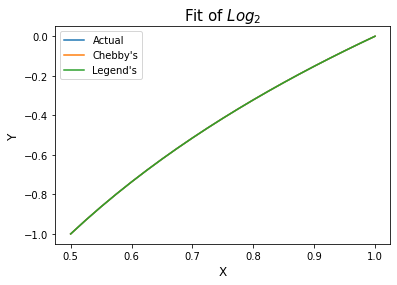

In [115]:
#plot of function for true and different fits
plt.plot(x,y, label = "Actual")
plt.plot(x,y_cheb, label="Chebby's")
plt.plot(x,y_leg, label="Legend's")
plt.title("Fit of $Log_2$", fontsize = 15, loc='center')
plt.xlabel("X",fontsize=12)
plt.ylabel("Y",fontsize=12)
plt.legend()
plt.show()

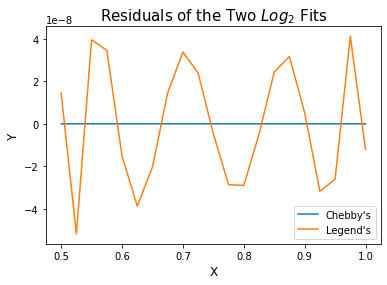

In [116]:
#plot of function for true and different fits
#plt.plot(x,y, label = "Actual")
plt.plot(x,y_cheb-y, label="Chebby's")
plt.plot(x,y_leg-y, label="Legend's")
plt.title("Residuals of the Two $Log_2$ Fits", fontsize = 15, loc='center')
plt.xlabel("X",fontsize=12)
plt.ylabel("Y",fontsize=12)
plt.legend()
plt.show()

# Problem No. 2

In [12]:
#input data
df = pd.DataFrame({'elements': ['U238', 'Th234', 'Pa234', 'U234', 'Th230', 'Ra226', 'Rn222', 'Po218',
                                'Pb214', 'Bi214', 'Po214', 'Pb210', 'Bi210', 'Po210', 'Pb206'],
                   'half-life': [4.468e9, 24.10/365.24, 6.70/24/365.24, 2.455e5, 7.538e4, 1.6e3, 3.8235/365.24, 3.1/60/24/365.24, 
                                 26.8/60/24/365.24, 19.9/60/24/365.24, 164.3e-6/60/60/24/365.24, 22.3, 5.015, 138.376/365, None]})

In [13]:
df

,elements,half-life
0,U238,4.468000e+09
1,Th234,6.598401e-02
2,Pa234,7.643376e-04
3,U234,2.455000e+05
4,Th230,7.538000e+04
5,Ra226,1.600000e+03
6,Rn222,1.046846e-02
7,Po218,5.894146e-06
8,Pb214,5.095584e-05
9,Bi214,3.783661e-05


In [40]:
#code from class 
def fun(x,y,half_life=[1,1e-5]):
    #let's do a 2-state radioactive decay
    dydx=np.zeros(len(half_life)+1)
    dydx[0]=-y[0]/half_life[0]
    dydx[1]=y[0]/half_life[0]-y[1]/half_life[1]
    dydx[2]=y[1]/half_life[1]
    return dydx


y0=np.asarray([1,0,0]) 
x0=0
x1=1
t1=time.time();
ans_rk4=integrate.solve_ivp(fun,[x0,x1],y0);
t2=time.time();
print('took ',ans_rk4.nfev,' evaluations and ',t2-t1,' seconds to solve with RK4.')
t1=time.time()
ans_stiff=integrate.solve_ivp(fun,[x0,x1],y0,method='Radau')
t2=time.time()
print('took ',ans_stiff.nfev,' evaluations and ',t2-t1,' seconds to solve implicitly')
print('final values were ',ans_rk4.y[0,-1],' and ',ans_stiff.y[0,-1],' with truth ',np.exp(-1*(x1-x0)))

took  225920  evaluations and  4.4072105884552  seconds to solve with RK4.
took  72  evaluations and  0.29047322273254395  seconds to solve implicitly
final values were  0.3678794411714375  and  0.36788037058788153  with truth  0.36787944117144233


Should use the ans_stiff or from its argument, method = 'Radau'

Bateman Equation: https://en.wikipedia.org/wiki/Bateman_equation#:~:text=In%20nuclear%20physics%2C%20the%20Bateman,by%20Harry%20Bateman%20in%201910.

In [62]:
half_lives = np.array(df['half-life'].iloc[:14])

def fun(x,y,half_life=half_lives):
    #Bateman equation
    dydx=np.zeros(len(half_life)+1)
    
    dydx[0]=-y[0]/half_life[0]
    for i in range (1, len(half_life)):
        dydx[i]=y[i-1]/half_life[i-1]-y[i]/half_life[i]
    dydx[-1]=y[-2]/half_life[-2]
    return dydx


y0=np.zeros(len(half_lives)+1)
y0[0]=1
x0=0
x1=df['half-life'][0]
#t1=time.time();
#ans_rk4=integrate.solve_ivp(fun,[x0,x1],y0);
#t2=time.time();
#print('took ',ans_rk4.nfev,' evaluations and ',t2-t1,' seconds to solve with RK4.')
t1=time.time()
ans_stiff=integrate.solve_ivp(fun,[x0,x1],y0,method='Radau')
t2=time.time()
print('took ',ans_stiff.nfev,' evaluations and ',t2-t1,' seconds to solve implicitly')
#print('final values were ',ans_rk4.y[0,-1],' and ',ans_stiff.y[0,-1],' with truth ',np.exp(-1*(x1-x0)))
print('final value is ', ans_stiff.y[0,-1])

took  107  evaluations and  0.11414670944213867  seconds to solve implicitly
final values were  0.3678794411714375  and  0.3678811962826214  with truth  0.0
final value is  0.3678811962826214


No handles with labels found to put in legend.


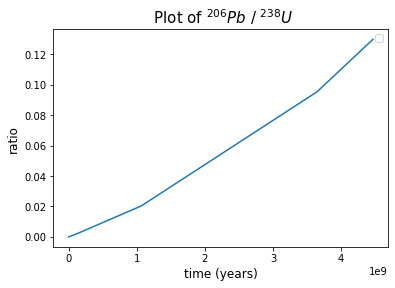

In [77]:
#Ratio of Pb206/U238
#plotting
x=ans_stiff.t
y=ans_stiff.y[-1,:]/ans_stiff.y[0,:]
plt.plot(x,y, )
plt.title(" Plot of $^{206}Pb$ / $^{238}U$", fontsize = 15, loc='center')
plt.xlabel("time (years)",fontsize=12)
plt.ylabel("ratio",fontsize=12)
plt.show()

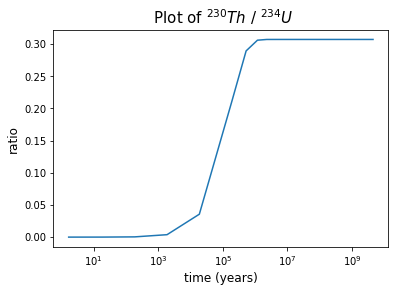

In [102]:
#Ratio of Th230/U234
#plotting
x=ans_stiff.t[1:]
y=ans_stiff.y[4,1:]/ans_stiff.y[3,1:]
plt.plot(x,y, )
plt.title(" Plot of $^{230}Th$ / $^{234}U$", fontsize = 15, loc='center')
plt.xlabel("time (years)",fontsize=12)
plt.ylabel("ratio",fontsize=12)
plt.xscale("log")
plt.show()

In [93]:
ans_stiff.y[3,1:]

array([3.63226276e-10, 4.13493459e-09, 4.18465873e-08, 4.17542394e-07,
       4.03596298e-06, 2.93235120e-05, 4.84816026e-05, 5.44629736e-05,
       5.49090372e-05, 5.48867152e-05, 5.47346078e-05, 5.35807634e-05,
       4.32987658e-05, 2.42964719e-05, 2.02148157e-05])

In [98]:
x[1:]

array([1.68566250e+00, 1.85422875e+01, 1.87108538e+02, 1.87277104e+03,
       1.87293961e+04, 1.87295646e+05, 5.25719962e+05, 1.17855516e+06,
       2.29076794e+06, 5.03705069e+06, 1.74890884e+07, 1.12686976e+08,
       1.06466585e+09, 3.64626612e+09, 4.46800000e+09])